In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pylab 
import scipy.stats as stats
import statsmodels.api as sm 


#Cutlet DS

In [29]:
cutlet_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Hypothesis/Cutlets.csv')
cutlet_df.head(5)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [30]:
cutlet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [31]:
#There are no null values , lets describe

In [32]:
cutlet_df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [33]:
#Lets do two sample t-test
#Ho= same averages diameters of Unit A and  unit B
#Ha= no same averages diameters of Unit A and unit B

In [34]:
stats.ttest_ind (cutlet_df['Unit A'],cutlet_df['Unit B'])

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

In [35]:
# pvalue(=0.47) >alpha(0.05), hence we can't reject the null hypothesis

In [36]:
#Conclusion: same averages diameters of Unit A and  unit B at 5% significance level

#LabTAT DS

In [37]:
LabTat_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Hypothesis/LabTAT.csv')
LabTat_df

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [38]:
LabTat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [39]:
LabTat_df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


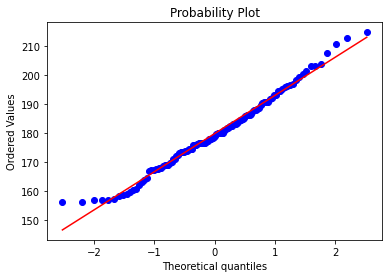

In [40]:
NM1= np.random.normal(loc = 178.361583	, scale = 13 , size=120)   
stats.probplot(NM1, dist="norm", plot=pylab)
pylab.show()

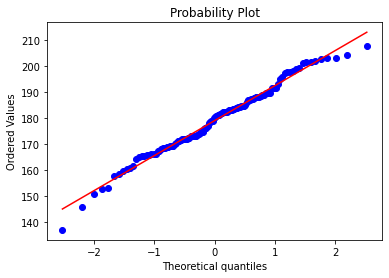

In [41]:
NM2= np.random.normal(loc = 178.902917, scale = 13  , size=120)   
stats.probplot(NM2, dist="norm", plot=pylab)
pylab.show()

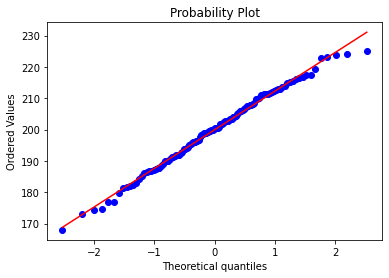

In [42]:
NM3= np.random.normal(loc = 199.913250, scale = 13  , size=120)   
stats.probplot(NM3, dist="norm", plot=pylab)
pylab.show()

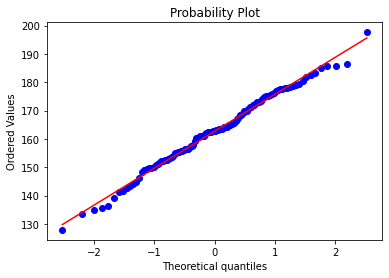

In [43]:
NM4= np.random.normal(loc = 163.68275, scale = 13 , size=120)   
stats.probplot(NM4, dist="norm", plot=pylab)
pylab.show()

In [44]:
#Every Datapoints looks normally distributed

In [45]:
#Ho = All means are equal
#Ha = All means are not equal

In [46]:
#We can see there are 4 samples involved, we can go for Annova Test

In [47]:
stats.f_oneway(LabTat_df['Laboratory 1'],LabTat_df['Laboratory 2'],LabTat_df['Laboratory 3'],LabTat_df['Laboratory 4'])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [48]:
#Pvalue=2.1156708949992414e-57<alpha(0.05)
#Rejecting null hypothesis and accepting alternate hypothesis

#Buyer Ratio

In [49]:
Buyer_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Hypothesis/BuyerRatio.csv')
Buyer_df

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [50]:
#Ho= Proportions of Male and Female are same
#Ha= Proportions of Male and Female are not same

In [55]:
Buyer1_df=Buyer_df.drop(['Observed Values'],axis=1)

In [57]:
chi2_stat, p_val, dof, ex =stats.chi2_contingency(Buyer1_df) 

print("Chi2 Stat",chi2_stat,"\n","Degrees of Freedom",dof,"\n","P-Value",p_val,"\n","Contingency Table",ex)


Chi2 Stat 1.595945538661058 
 Degrees of Freedom 3 
 P-Value 0.6603094907091882 
 Contingency Table [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [ ]:
#P-Value=== 0.6603094907091882 >alpha(0.05)
#Hence we can not reject null hypothesis

In [ ]:
#Conclusion-Proportions of Male and Female are same

#Customer Table

In [58]:
Cust_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Hypothesis/Costomer+OrderForm.csv')
Cust_df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [61]:
Cust_df.isnull().value_counts()

Phillippines  Indonesia  Malta  India
False         False      False  False    300
dtype: int64

In [63]:
print(Cust_df['Phillippines'].value_counts(),'/n',Cust_df['Malta'].value_counts(),'/n',Cust_df['Indonesia'].value_counts(),'/n',Cust_df['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 /n Error Free    269
Defective      31
Name: Malta, dtype: int64 /n Error Free    267
Defective      33
Name: Indonesia, dtype: int64 /n Error Free    280
Defective      20
Name: India, dtype: int64


In [64]:
custorder = pd.DataFrame(index=['Error Free','Defective'],
                  data={'Phillippines':[271,29],'Indonesia':[267,33],'Malta':[269,31],'India':[280,20]})

In [66]:
#there are 4 varibales which are categorical, so we can use ChiSquare Test
from scipy.stats import chi2_contingency

In [ ]:
#Ho= Percentages of Defective across all the centres is same
#Ha= Percentages of Defective across all the centres is not same

In [67]:
chi2_stat, p_val, dof, ex =stats.chi2_contingency(custorder) 

print("Chi2 Stat",chi2_stat,"\n","Degrees of Freedom",dof,"\n","P-Value",p_val,"\n","Contingency Table",ex)

Chi2 Stat 3.858960685820355 
 Degrees of Freedom 3 
 P-Value 0.2771020991233135 
 Contingency Table [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [ ]:
#p-value (0.277)> alpha (0.05), we will accept null hypothesis
#Conclusion: Percentages of Defective across all the centres is same

#Fantaloon

In [68]:
Fat_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Hypothesis/Faltoons (1).csv')
Fat_df

,Weekdays,Weekend
0,Male,Female
1,Female,Male
2,Female,Male
3,Male,Female
4,Female,Female
...,...,...
395,Female,Male
396,Female,Female
397,Female,Female
398,Female,Male


In [70]:
print(Fat_df['Weekdays'].value_counts(),Fat_df['Weekend'].value_counts())

Female    287
Male      113
Name: Weekdays, dtype: int64 Female    233
Male      167
Name: Weekend, dtype: int64


In [72]:
fat= pd.DataFrame(index=['Female','Male'],
                  data={'Weekdays':[287,113],'Weekend':[233,167]})


In [74]:
fat

,Weekdays,Weekend
Female,287,233
Male,113,167


In [ ]:
from scipy.stats import chi2_contingency
#Ho=  % of males versus females walking in to the store doesn't differ based on day of the week
#Ha=  % of males versus females walking in to the store differ based on day of the week

In [75]:
chi2_stat, p_val, dof, ex =stats.chi2_contingency(fat) 

print("Chi2 Stat",chi2_stat,"\n","Degrees of Freedom",dof,"\n","P-Value",p_val,"\n","Contingency Table",ex)

Chi2 Stat 15.434065934065934 
 Degrees of Freedom 1 
 P-Value 8.54342267020237e-05 
 Contingency Table [[260. 260.]
 [140. 140.]]


In [ ]:
#p-value (0.8534e-05)<alpha (0.05),Reject the null hypothesis
#Conclusion: Proportions of Male and Female are not same.